In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Flight_Data.csv')

In [3]:
Geographical_map = nx.Graph()

In [4]:
df2 = df.head(20)

In [5]:
df2

,Airline,SourceAirport,DestinationAirport,SourceAirport_City,SourceAirport_Country,SourceAirport_Latitude,SourceAirport_Longitude,SourceAirport_Altitude,DestinationAirport_City,DestinationAirport_Country,DestinationAirport_Latitude,DestinationAirport_Longitude,DestinationAirport_Altitude,Distance,FlyTime,Price
0,Pegasus Airlines,Sabiha Gökçen International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.898602,29.309200,312,Tehran,Iran,35.416100,51.152199,3305,1998.541333,2.982660,969.270667
1,Turkish Airlines,Sabiha Gökçen International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.898602,29.309200,312,Tehran,Iran,35.416100,51.152199,3305,1998.541333,2.982660,969.270667
2,Turkish Airlines,Atatürk International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.976898,28.814600,163,Tehran,Iran,35.416100,51.152199,3305,2040.978811,3.035377,990.489405
3,Emirates,Dubai International Airport,Imam Khomeini International Airport,Dubai,United Arab Emirates,25.252800,55.364399,62,Tehran,Iran,35.416100,51.152199,3305,1199.863567,1.990514,569.931784
4,Etihad Airways,Abu Dhabi International Airport,Imam Khomeini International Airport,Abu Dhabi,United Arab Emirates,24.433001,54.651100,88,Tehran,Iran,35.416100,51.152199,3305,1266.681453,2.073517,603.340726
5,Air Arabia,Sharjah International Airport,Imam Khomeini International Airport,Sharjah,United Arab Emirates,25.328600,55.517200,111,Tehran,Iran,35.416100,51.152199,3305,1196.902147,1.986835,568.451073
6,Qatar Airways,Hamad International Airport,Imam Khomeini International Airport,Doha,Qatar,25.273056,51.608056,13,Tehran,Iran,35.416100,51.152199,3305,1128.698504,1.902110,534.349252
7,Iran Air,Dubai International Airport,Imam Khomeini International Airport,Dubai,United Arab Emirates,25.252800,55.364399,62,Tehran,Iran,35.416100,51.152199,3305,1199.863567,1.990514,569.931784
8,Iran Air,Atatürk International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.976898,28.814600,163,Tehran,Iran,35.416100,51.152199,3305,2040.978811,3.035377,990.489405
9,Iran Air,Esenboğa International Airport,Imam Khomeini International Airport,Ankara,Turkey,40.128101,32.995098,3125,Tehran,Iran,35.416100,51.152199,3305,1676.121317,2.582138,808.060659


In [6]:
df3 = df2.filter(items = ['SourceAirport', 'DestinationAirport', 'Distance'])

In [7]:
dict = df3.to_dict()

In [8]:
dict

{'SourceAirport': {0: 'Sabiha Gökçen International Airport',
  1: 'Sabiha Gökçen International Airport',
  2: 'Atatürk International Airport',
  3: 'Dubai International Airport',
  4: 'Abu Dhabi International Airport',
  5: 'Sharjah International Airport',
  6: 'Hamad International Airport',
  7: 'Dubai International Airport',
  8: 'Atatürk International Airport',
  9: 'Esenboğa International Airport',
  10: 'Atatürk International Airport',
  11: 'Dubai International Airport',
  12: 'Atatürk International Airport',
  13: 'Dubai International Airport',
  14: 'Atatürk International Airport',
  15: 'Esenboğa International Airport',
  16: 'Adnan Menderes International Airport',
  17: "Chicago O'Hare International Airport",
  18: 'Los Angeles International Airport',
  19: 'Dubai International Airport'},
 'DestinationAirport': {0: 'Imam Khomeini International Airport',
  1: 'Imam Khomeini International Airport',
  2: 'Imam Khomeini International Airport',
  3: 'Imam Khomeini International Ai

In [9]:
source_airport_dict = dict['SourceAirport']
destination_airport_dict = dict['DestinationAirport']
distance_dict = dict['Distance']

In [10]:
source_airport_dict
destination_airport_dict
distance_dict

{0: 1998.5413333328268,
 1: 1998.5413333328268,
 2: 2040.9788105605924,
 3: 1199.863567129553,
 4: 1266.6814529891146,
 5: 1196.9021466325523,
 6: 1128.6985039169483,
 7: 1199.863567129553,
 8: 2040.9788105605924,
 9: 1676.121317120518,
 10: 2040.9788105605924,
 11: 1199.863567129553,
 12: 2040.9788105605924,
 13: 1199.863567129553,
 14: 2040.9788105605924,
 15: 1676.121317120518,
 16: 330.5162311808217,
 17: 8813.934347917042,
 18: 11034.23527495448,
 19: 3008.3631780961928}

In [11]:
for i in source_airport_dict:
    Geographical_map.add_edge(source_airport_dict[i], destination_airport_dict[i], weight=distance_dict[i])

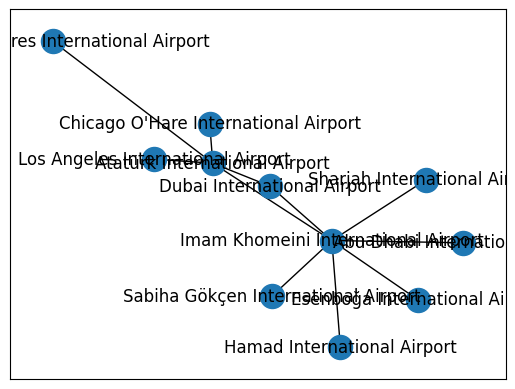

In [12]:
nx.draw_networkx(Geographical_map)


In [13]:
source_airport_set = set(df3['SourceAirport'])
destination_airport_set = set(df3['DestinationAirport'])

In [14]:
destination_airport_set.update(source_airport_set)

In [15]:
destination_airport_set

{'Abu Dhabi International Airport',
 'Adnan Menderes International Airport',
 'Atatürk International Airport',
 "Chicago O'Hare International Airport",
 'Dubai International Airport',
 'Esenboğa International Airport',
 'Hamad International Airport',
 'Imam Khomeini International Airport',
 'Los Angeles International Airport',
 'Sabiha Gökçen International Airport',
 'Sharjah International Airport'}

In [16]:
 for i in range(0, len(destination_airport_set)):
    d = dict.fromkeys(destination_airport_set,i)

In [42]:
d = {}
i = 0
for item in destination_airport_set:
    d.update({i: item})
    i+=1

In [43]:
d

{0: 'Sharjah International Airport',
 1: 'Sabiha Gökçen International Airport',
 2: 'Los Angeles International Airport',
 3: 'Abu Dhabi International Airport',
 4: 'Esenboğa International Airport',
 5: 'Adnan Menderes International Airport',
 6: 'Atatürk International Airport',
 7: 'Hamad International Airport',
 8: 'Imam Khomeini International Airport',
 9: 'Dubai International Airport',
 10: "Chicago O'Hare International Airport"}